<center>
    <h1> CardioRisk: Unraveling Patterns for Early Diagnosis Using Machine Learning </h1>
    <h2> Data Statistics </h2>
    <h4> Akansha Malviya, Shruti Badrinarayanan, Poojitha Venkat Ram, Vani Kancherlapalli </h4>
</center>

## Load Data

In [1]:
import pandas as pd

# Reading the newly saved CSV file 'initial_preprocessed_dataset.csv'
df = pd.read_csv('/Users/akanshamalviya/Documents/Input_Data/initial_preprocessed_dataset.csv')

# Displaying the DataFrame
df

,id,age,sex,painloc,painexer,relrest,cp,trestbps,htn,chol,...,cxmain,om1,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,num_encoded
0,1,63,1,1.0,1.0,1.0,1,145.0,1.0,233.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
1,2,67,1,1.0,1.0,1.0,4,160.0,1.0,286.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
2,3,67,1,1.0,1.0,1.0,4,120.0,1.0,229.0,...,1.0,1.0,2.0,2.0,1.0,1.0,1.0,7.0,3.0,1
3,4,37,1,1.0,1.0,1.0,3,130.0,0.0,250.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
4,6,41,0,1.0,1.0,1.0,2,130.0,1.0,204.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,4070,54,1,1.0,1.0,1.0,4,180.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
895,4071,56,1,1.0,1.0,1.0,4,125.0,0.0,0.0,...,2.0,1.0,2.0,1.0,5.0,1.0,1.0,1.0,2.0,1
896,4072,56,1,0.0,1.0,1.0,3,125.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,5.0,3.0,2.0,1
897,4073,54,1,1.0,1.0,1.0,4,130.0,0.0,0.0,...,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1


In [2]:
# Checking the newly uploaded 'preprocessed_dataset.csv' for missing values

# Reload the dataset in case it has changed
new_file_path = '/Users/akanshamalviya/Documents/Input_Data/initial_preprocessed_dataset.csv'
new_preprocessed_dataset = pd.read_csv(new_file_path)

# Displaying the columns with missing values and their count for the new dataset
new_missing_values_count = new_preprocessed_dataset.isnull().sum()
new_missing_columns_with_count = new_missing_values_count[new_missing_values_count > 0]
new_missing_columns_with_count

restecg      2
ca         608
lvf         16
dtype: int64

## Multiple Imputation process for handling missing values

In [3]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Creating the imputer object. Note: This will use Bayesian Ridge Regression by default.
imputer = IterativeImputer(max_iter=10, random_state=0)

# Performing multiple imputation
df_imputed = df.copy()
df_imputed = pd.DataFrame(imputer.fit_transform(df_imputed), columns=df.columns)

# Check the imputed values for 'ca' and other columns with previously missing values
imputed_values_summary = df_imputed.describe()

imputed_values_summary[['ca', 'restecg', 'lvf']]  # Focusing on columns with notable missing values earlier

,ca,restecg,lvf
count,899.000000,899.000000,899.000000
mean,1.132168,0.602574,1.183335
std,0.821611,0.802888,0.509799
min,-0.285430,0.000000,0.000000
25%,0.501552,0.000000,1.000000
50%,1.142465,0.000000,1.000000
75%,1.632400,1.000000,1.000000
max,9.000000,2.000000,5.000000


In [4]:
# Setting the imputed dataset as the new dataframe
data = df_imputed.copy()

# Displaying the first few rows of the updated dataframe to confirm
data.head()

,id,age,sex,painloc,painexer,relrest,cp,trestbps,htn,chol,...,cxmain,om1,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,num_encoded
0,1.0,63.0,1.0,1.0,1.0,1.0,1.0,145.0,1.0,233.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,2.0,67.0,1.0,1.0,1.0,1.0,4.0,160.0,1.0,286.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,3.0,67.0,1.0,1.0,1.0,1.0,4.0,120.0,1.0,229.0,...,1.0,1.0,2.0,2.0,1.0,1.0,1.0,7.0,3.0,1.0
3,4.0,37.0,1.0,1.0,1.0,1.0,3.0,130.0,0.0,250.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,6.0,41.0,0.0,1.0,1.0,1.0,2.0,130.0,1.0,204.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [5]:
data.drop(columns=['id'], inplace=True)

In [6]:
# Save the imputed DataFrame to a new CSV file
imputed_file_path = '/Users/akanshamalviya/Documents/Input_Data/final_preprocessed_dataset.csv'
data.to_csv(imputed_file_path, index=False)

# Confirm the file path for the user
imputed_file_path

'final_preprocessed_dataset.csv'

In [7]:
# checking for missing values in final preprocessed dataset
new_file_path = '/Users/akanshamalviya/Documents/Input_Data/final_preprocessed_dataset.csv'
new_preprocessed_dataset = pd.read_csv(new_file_path)

# Displaying the columns with missing values and their count for the new dataset
new_missing_values_count = new_preprocessed_dataset.isnull().sum()
new_missing_columns_with_count = new_missing_values_count[new_missing_values_count > 0]
new_missing_columns_with_count

Series([], dtype: int64)

### No missing values, let's continue with Dimensionality Reduction.

In [8]:
# Load the dataset
data = pd.read_csv('/Users/akanshamalviya/Documents/Input_Data/final_preprocessed_dataset.csv')

## 1. Dimensionality Reduction

### Split Data for Baseline Modeling using PCA and LDA

In [9]:
# Select only the chosen features for X
X = data.drop('num_encoded', axis=1)

# The last column of 'data' is the target variable
y = data.iloc[:, -1]

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Dataset Samples

In [11]:
# Convert the scaled training data back to a DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df['target'] = y_train.values

# Convert the scaled testing data back to a DataFrame
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled_df['target'] = y_test.values

In [12]:
# Display the combined DataFrame
X_train_scaled_df  # Training data with target variable

,age,sex,painloc,painexer,relrest,cp,trestbps,htn,chol,fbs,...,cxmain,om1,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,target
0,2.150388,0.511276,-4.420730,-1.627804,-1.876703,-1.391787,0.676765,1.067652,-1.812612,-0.431820,...,-0.547888,-0.383054,-0.580027,-0.375859,0.030945,0.000538,0.055681,0.003910,1.687619,1.0
1,0.892606,0.511276,0.226207,-1.627804,-1.876703,-1.391787,0.409648,-0.936635,0.647353,-0.431820,...,-0.547888,-0.383054,-0.580027,-0.375859,-0.072970,-0.075728,-0.171137,-0.355012,-0.348856,0.0
2,1.102236,0.511276,0.226207,0.614325,0.532849,0.802720,-0.124587,1.067652,0.529347,2.315779,...,-0.547888,-0.383054,1.724058,-0.375859,-0.072970,-0.075728,-0.171137,-0.355012,-0.348856,1.0
3,-0.365177,0.511276,0.226207,0.614325,0.532849,0.802720,0.409648,1.067652,-0.641633,-0.431820,...,-0.547888,-0.383054,-0.580027,-0.375859,-0.072970,-0.075728,-0.171137,-0.355012,-0.348856,0.0
4,0.997421,0.511276,0.226207,0.614325,0.532849,0.802720,-0.124587,-0.936635,1.182917,2.315779,...,1.825192,2.610597,1.724058,-0.375859,-0.072970,-0.075728,-0.171137,-0.355012,-0.348856,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,0.578160,0.511276,0.226207,0.614325,0.532849,0.802720,0.409648,1.067652,-0.205919,-0.431820,...,1.825192,-0.383054,-0.580027,-0.375859,-0.072970,-0.075728,-0.171137,-0.355012,-0.348856,1.0
715,0.787791,0.511276,0.226207,0.614325,0.532849,0.802720,0.409648,-0.936635,0.066401,-0.431820,...,-0.547888,-0.383054,-0.580027,-0.375859,-0.072970,-0.075728,-0.171137,-0.355012,-0.348856,1.0
716,1.207051,0.511276,0.226207,0.614325,0.532849,0.802720,1.478117,1.067652,-1.812612,2.315779,...,-0.547888,-0.383054,1.724058,-0.375859,-0.072970,-0.075728,-0.171137,3.167493,1.687619,1.0
717,0.158899,0.511276,0.226207,0.614325,0.532849,0.802720,-0.658822,-0.936635,0.638275,-0.431820,...,-0.547888,-0.383054,-0.580027,-0.375859,-0.072970,-0.075728,-0.171137,-0.355012,-0.348856,0.0


In [13]:
# Display the combined DataFrame
X_test_scaled_df  # Testing data with target variable

,age,sex,painloc,painexer,relrest,cp,trestbps,htn,chol,fbs,...,cxmain,om1,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,target
0,-0.365177,0.511276,0.226207,0.614325,0.532849,0.802720,-0.124587,-0.936635,0.302413,-0.431820,...,-0.547888,-0.383054,1.724058,-0.375859,-0.07297,-0.075728,-0.171137,3.754578,1.687619,1.0
1,-0.155546,0.511276,0.226207,0.614325,0.532849,0.802720,-1.994409,-0.936635,-1.812612,-0.431820,...,1.825192,-0.383054,1.724058,-0.375859,-0.07297,-0.075728,-0.171137,-0.355012,0.509724,1.0
2,1.102236,0.511276,0.226207,0.614325,0.532849,0.802720,-0.012334,1.067652,0.402264,2.315779,...,1.825192,-0.383054,1.724058,-0.375859,-0.07297,-0.075728,-0.171137,3.167493,-0.348856,1.0
3,0.682975,-1.955889,0.226207,0.614325,0.532849,-0.294534,-0.658822,-0.936635,-0.196842,2.315779,...,-0.547888,-0.383054,-0.580027,-0.375859,-0.07297,-0.075728,-0.171137,-0.355012,-0.348856,0.0
4,0.787791,0.511276,0.226207,0.614325,0.532849,-0.294534,0.943882,1.067652,0.393186,2.315779,...,-0.547888,-0.383054,-0.580027,-0.375859,-0.07297,-0.075728,-0.171137,-0.355012,-0.348856,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.787791,0.511276,0.226207,0.614325,0.532849,0.802720,-1.460174,-0.936635,-1.812612,-0.431820,...,-0.547888,-0.383054,1.724058,-0.375859,-0.07297,-0.075728,-0.171137,-0.355012,-0.348856,1.0
176,-0.365177,-1.955889,0.226207,0.614325,0.532849,-0.294534,-0.658822,-0.936635,0.175330,-0.431820,...,-0.547888,-0.383054,-0.580027,-0.375859,-0.07297,-0.075728,-0.171137,-0.355012,-0.348856,0.0
177,-0.155546,0.511276,0.226207,0.614325,0.532849,-1.391787,-0.658822,1.067652,1.137530,-0.431820,...,-0.547888,-0.383054,-0.580027,-0.375859,-0.07297,-0.075728,-0.171137,-0.355012,-0.348856,0.0
178,0.368530,0.511276,0.226207,0.614325,0.532849,0.802720,0.409648,-0.936635,-0.069759,-0.431820,...,-0.547888,-0.383054,-0.580027,-0.375859,-0.07297,-0.075728,-0.171137,-0.355012,-0.348856,0.0


### 1.1 PCA

In [14]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import time

# Initialize a Random Forest classifier
classifier = RandomForestClassifier(random_state=42)

# List to store results
results = []

# Number of components to test for PCA
# n_components = [10, 20, 30, 35, 40, 50]
n_components = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

for n in n_components:
    # Start the timer
    start_time = time.time()
    
    # Initialize PCA with the current number of components
    pca = PCA(n_components=n)
    
    # Transform the training data
    X_train_pca = pca.fit_transform(X_train_scaled)
    
    # Transform the testing data
    X_test_pca = pca.transform(X_test_scaled)
    
    # Fit the classifier to the training set
    classifier.fit(X_train_pca, y_train)
    
    # Test the classifier on the testing set
    test_accuracy = classifier.score(X_test_pca, y_test)
    
    # End the timer
    end_time = time.time()
    
    # Calculate the run-time in seconds
    run_time = end_time - start_time
    
    # Store the results
    results.append({
        'PCA Components': n,
        'Test Accuracy': test_accuracy,
        'Run-Time (s)': run_time
    })

# Convert the results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Optionally, save the results to a CSV file
results_df.to_csv('PCA_test_accuracy_results.csv', index=False)

results_df

,PCA Components,Test Accuracy,Run-Time (s)
0,5,0.905556,0.170787
1,10,0.922222,0.187393
2,15,0.916667,0.312121
3,20,0.905556,0.235878
4,25,0.911111,0.292249
5,30,0.905556,0.346046
6,35,0.944444,0.329952
7,40,0.933333,0.285174
8,45,0.911111,0.386706
9,50,0.933333,0.388117


### Data after PCA with n_components=40

In [15]:
from sklearn.decomposition import PCA
import pandas as pd

# Assuming X_train_scaled_df and X_test_scaled_df are defined and include the 'target' column

# Initialize PCA with 40 components
pca = PCA(n_components=40)

# Fit PCA on the training data (excluding the target variable) and transform both sets
X_train_pca_40 = pca.fit_transform(X_train_scaled_df.drop('target', axis=1))
X_test_pca_40 = pca.transform(X_test_scaled_df.drop('target', axis=1))

# Convert the PCA-transformed data back to DataFrames
X_train_pca_40_df = pd.DataFrame(X_train_pca_40, columns=[i+1 for i in range(40)])
X_train_pca_40_df['target'] = X_train_scaled_df['target'].values

X_test_pca_40_df = pd.DataFrame(X_test_pca_40, columns=[i+1 for i in range(40)])
X_test_pca_40_df['target'] = X_test_scaled_df['target'].values

# Display the first few rows of the transformed data
X_train_pca_40_df

,1,2,3,4,5,6,7,8,9,10,...,32,33,34,35,36,37,38,39,40,target
0,-0.766935,-2.353474,0.666855,1.790006,2.471166,2.477473,0.962876,-2.439171,0.404615,-1.986088,...,1.710136,0.313500,-0.651644,-0.216032,-0.820337,-0.844128,-0.591588,0.538382,0.012462,1.0
1,-3.732850,-2.177280,-1.935404,1.336955,-0.652893,0.839545,0.218358,-0.386887,-0.144375,-0.500492,...,-0.443013,0.311716,-0.672536,-1.066886,-0.055299,0.003194,-0.539007,0.788195,-0.187139,0.0
2,1.843476,-0.389318,-0.046146,1.063272,0.402922,-0.240648,0.047470,0.841115,0.135274,-2.172294,...,-0.168109,-0.205389,-0.774231,-0.651174,0.174469,-0.121232,0.297091,-1.092843,-0.510920,1.0
3,-2.048637,-0.149163,0.158482,-1.459777,-1.914820,-0.667933,-0.366468,1.192296,1.081936,-0.271876,...,0.575804,-0.208756,0.483045,0.270546,0.331686,-0.144162,0.006243,0.144280,-0.086948,0.0
4,4.328346,1.455783,-1.130231,0.692913,-0.472766,1.465060,-0.779669,-2.449843,-1.778051,-0.790932,...,-0.673324,0.403204,-0.510762,1.919140,-0.062170,-0.202954,-0.479562,0.876458,0.032876,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,1.762246,1.532235,0.036873,0.364361,-1.307962,0.481195,0.663398,0.225311,-0.153818,-0.526096,...,-0.810439,0.109616,-1.039656,-0.139942,1.744363,0.886578,0.243788,-0.111357,-0.340558,1.0
715,1.287805,1.787164,-0.403692,0.910878,-1.444662,0.448444,-0.452303,-1.021009,-0.918742,0.508371,...,-0.725539,-0.616482,-1.587135,0.294064,-0.221532,-0.403016,0.156068,-0.448974,-0.259074,1.0
716,4.576414,-1.701957,0.571544,2.505701,1.047498,2.503107,0.723274,2.139162,1.321981,-4.264630,...,0.634040,-1.640712,-0.407667,-1.701723,-1.475635,-0.548300,1.359511,0.597624,0.928807,1.0
717,-2.055850,-0.752798,0.085860,-2.090918,-0.781065,-1.193076,2.593513,0.790864,-0.904424,-0.437684,...,0.464635,0.168204,0.303898,-0.379718,0.230896,0.161814,0.237173,0.280401,-0.086077,0.0


### 1.2 LDA

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from time import time

# Initialize LDA and Random Forest classifier
lda = LDA()
rf_classifier = RandomForestClassifier(random_state=42)

# Fit LDA to the training data and transform both the training and test sets
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

# Start the timer
start_time = time()

# Fit the Random Forest classifier to the LDA-transformed training data
rf_classifier.fit(X_train_lda, y_train)

# Test the classifier on the LDA-transformed test data
test_accuracy = rf_classifier.score(X_test_lda, y_test)

# End the timer
end_time = time()

# Calculate the runtime in seconds
runtime_seconds = end_time - start_time

# Print the results
print("LDA")
print(f"Test Accuracy: {test_accuracy:.6f}")
print(f"Run-Time in Seconds: {runtime_seconds:.2f}")

LDA
Test Accuracy: 0.944444
Run-Time in Seconds: 0.10


## 2. Splitting the Data

In [19]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Retrieve selected feature names and target
X = data.drop('num_encoded', axis=1)
y = data.iloc[:, -1]

# Split the data into training, testing, and validation sets first
# Split the data into training and a temporary set first (80% training, 20% temp)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the temporary set into validation and test sets (each 10% of the total data)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize the features for each dataset separately
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Apply PCA with 40 components to the standardized training data
pca = PCA(n_components=40)
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform the validation and testing sets with the same PCA model
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Convert the PCA-transformed data back to DataFrames
X_train_pca_df = pd.DataFrame(X_train_pca, columns=[i+1 for i in range(40)])
X_val_pca_df = pd.DataFrame(X_val_pca, columns=[i+1 for i in range(40)])
X_test_pca_df = pd.DataFrame(X_test_pca, columns=[i+1 for i in range(40)])

# Add the target variable back into the DataFrames
X_train_pca_df['target'] = y_train.reset_index(drop=True)
X_val_pca_df['target'] = y_val.reset_index(drop=True)
X_test_pca_df['target'] = y_test.reset_index(drop=True)

# Save the sets to CSV files
#X_train_pca_df.to_csv('Split Data/X_train_pca.csv', index=False)
#y_train.to_csv('Split Data/y_train.csv', index=False)
#X_val_pca_df.to_csv('Split Data/X_val_pca.csv', index=False)
#y_val.to_csv('Split Data/y_val.csv', index=False)
#X_test_pca_df.to_csv('Split Data/X_test_pca.csv', index=False)
#y_test.to_csv('Split Data/y_test.csv', index=False)

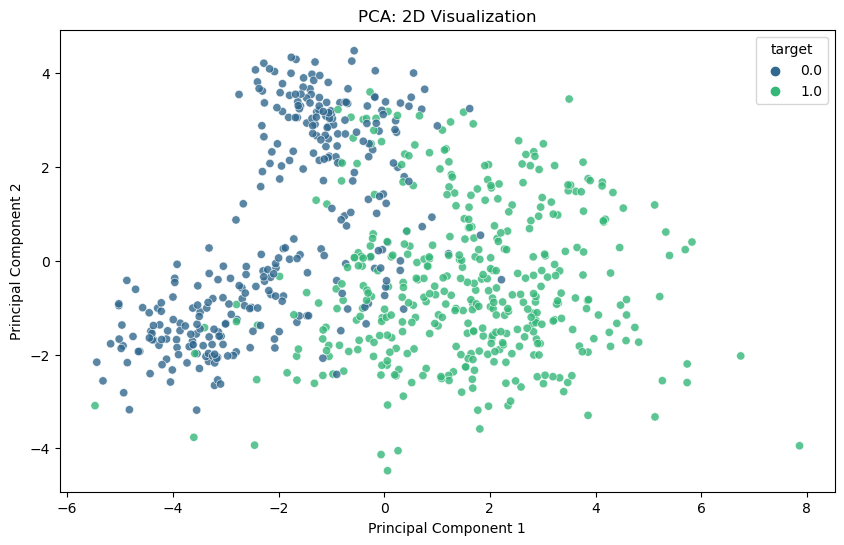

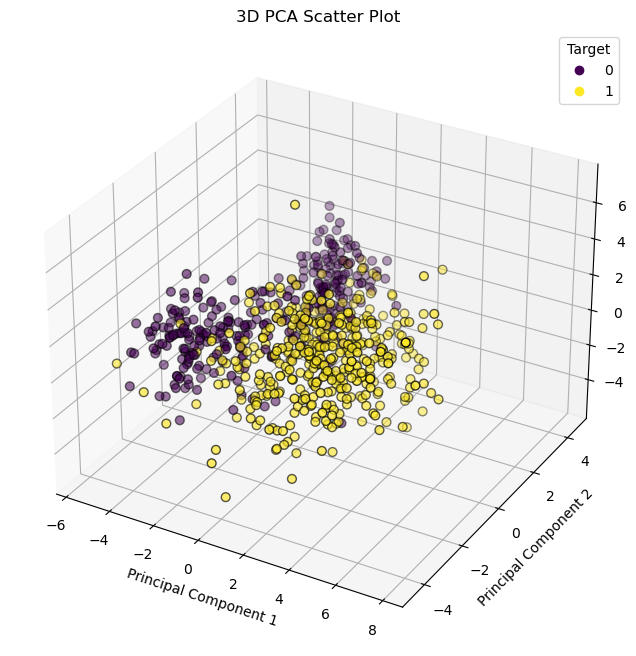

In [43]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Scatter plot for 2D visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=1, y=2, hue='target', data=X_train_pca_40_df, palette='viridis', alpha=0.8)
plt.title('PCA: 2D Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# 3D Scatter Plot

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    X_train_pca_df[1],
    X_train_pca_df[2],
    X_train_pca_df[3],
    c=X_train_pca_df['target'],
    cmap='viridis',
    edgecolors='k',
    s=40
)
ax.set_title('3D PCA Scatter Plot')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend(*scatter.legend_elements(), title='Target')
plt.show()

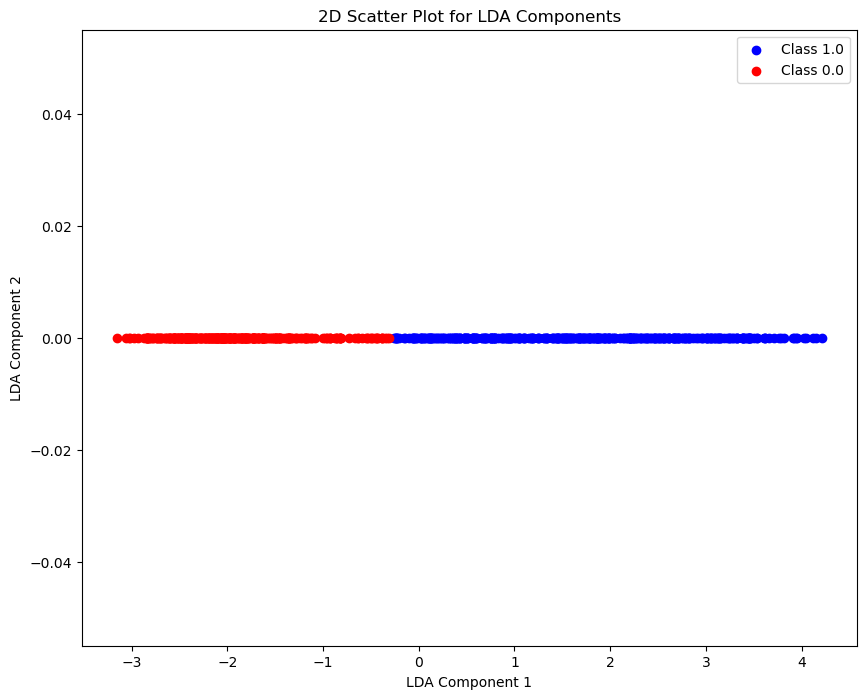

In [44]:


# Initialize LDA
lda = LDA(n_components=1)  # Choose the number of components

# Fit LDA to the training data and transform the training set
X_train_lda = lda.fit_transform(X_train_scaled, y_train)

# Create a DataFrame with LDA components for simplicity
columns = [f'LDA_Component_{i+1}' for i in range(X_train_lda.shape[1])]
lda_df = pd.DataFrame(data=X_train_lda, columns=columns)

# If only one component is generated, add a second column with zeros
if X_train_lda.shape[1] == 1:
    lda_df['LDA_Component_2'] = 0

# Add the predicted classes (not the original 'num' values) to the DataFrame
lda_df['Predicted_Class'] = lda.predict(X_train_scaled)

# Plot the 2D LDA scatter plot with red and blue colors
plt.figure(figsize=(10, 8))
for target_value in lda_df['Predicted_Class'].unique():
    target_subset = lda_df[lda_df['Predicted_Class'] == target_value]
    color = 'red' if target_value == 0 else 'blue'  # Adjust the colors based on your classes
    plt.scatter(target_subset['LDA_Component_1'], target_subset['LDA_Component_2'], label=f'Class {target_value}', color=color)

plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('2D Scatter Plot for LDA Components')
plt.legend()
plt.show()

In [ ]:
# Display the first few rows of the reduced training data
X_train_pca_df

In [ ]:
# Display the first few rows of the reduced training data
X_val_pca_df

In [ ]:
# Display the first few rows of the reduced training data
X_test_pca_df